#### Plot the Mesh of MPAS 25-90KM variable mesh x4.163842.static.nc 
- Global plot
- Targetted area  <br>

Ming Ge Dec. 2024

In [1]:
import numpy as np
import xarray as xr
import matplotlib.tri as tri
import matplotlib.pyplot as plt
 
from scipy.interpolate import griddata 
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
rad2deg = 57.296

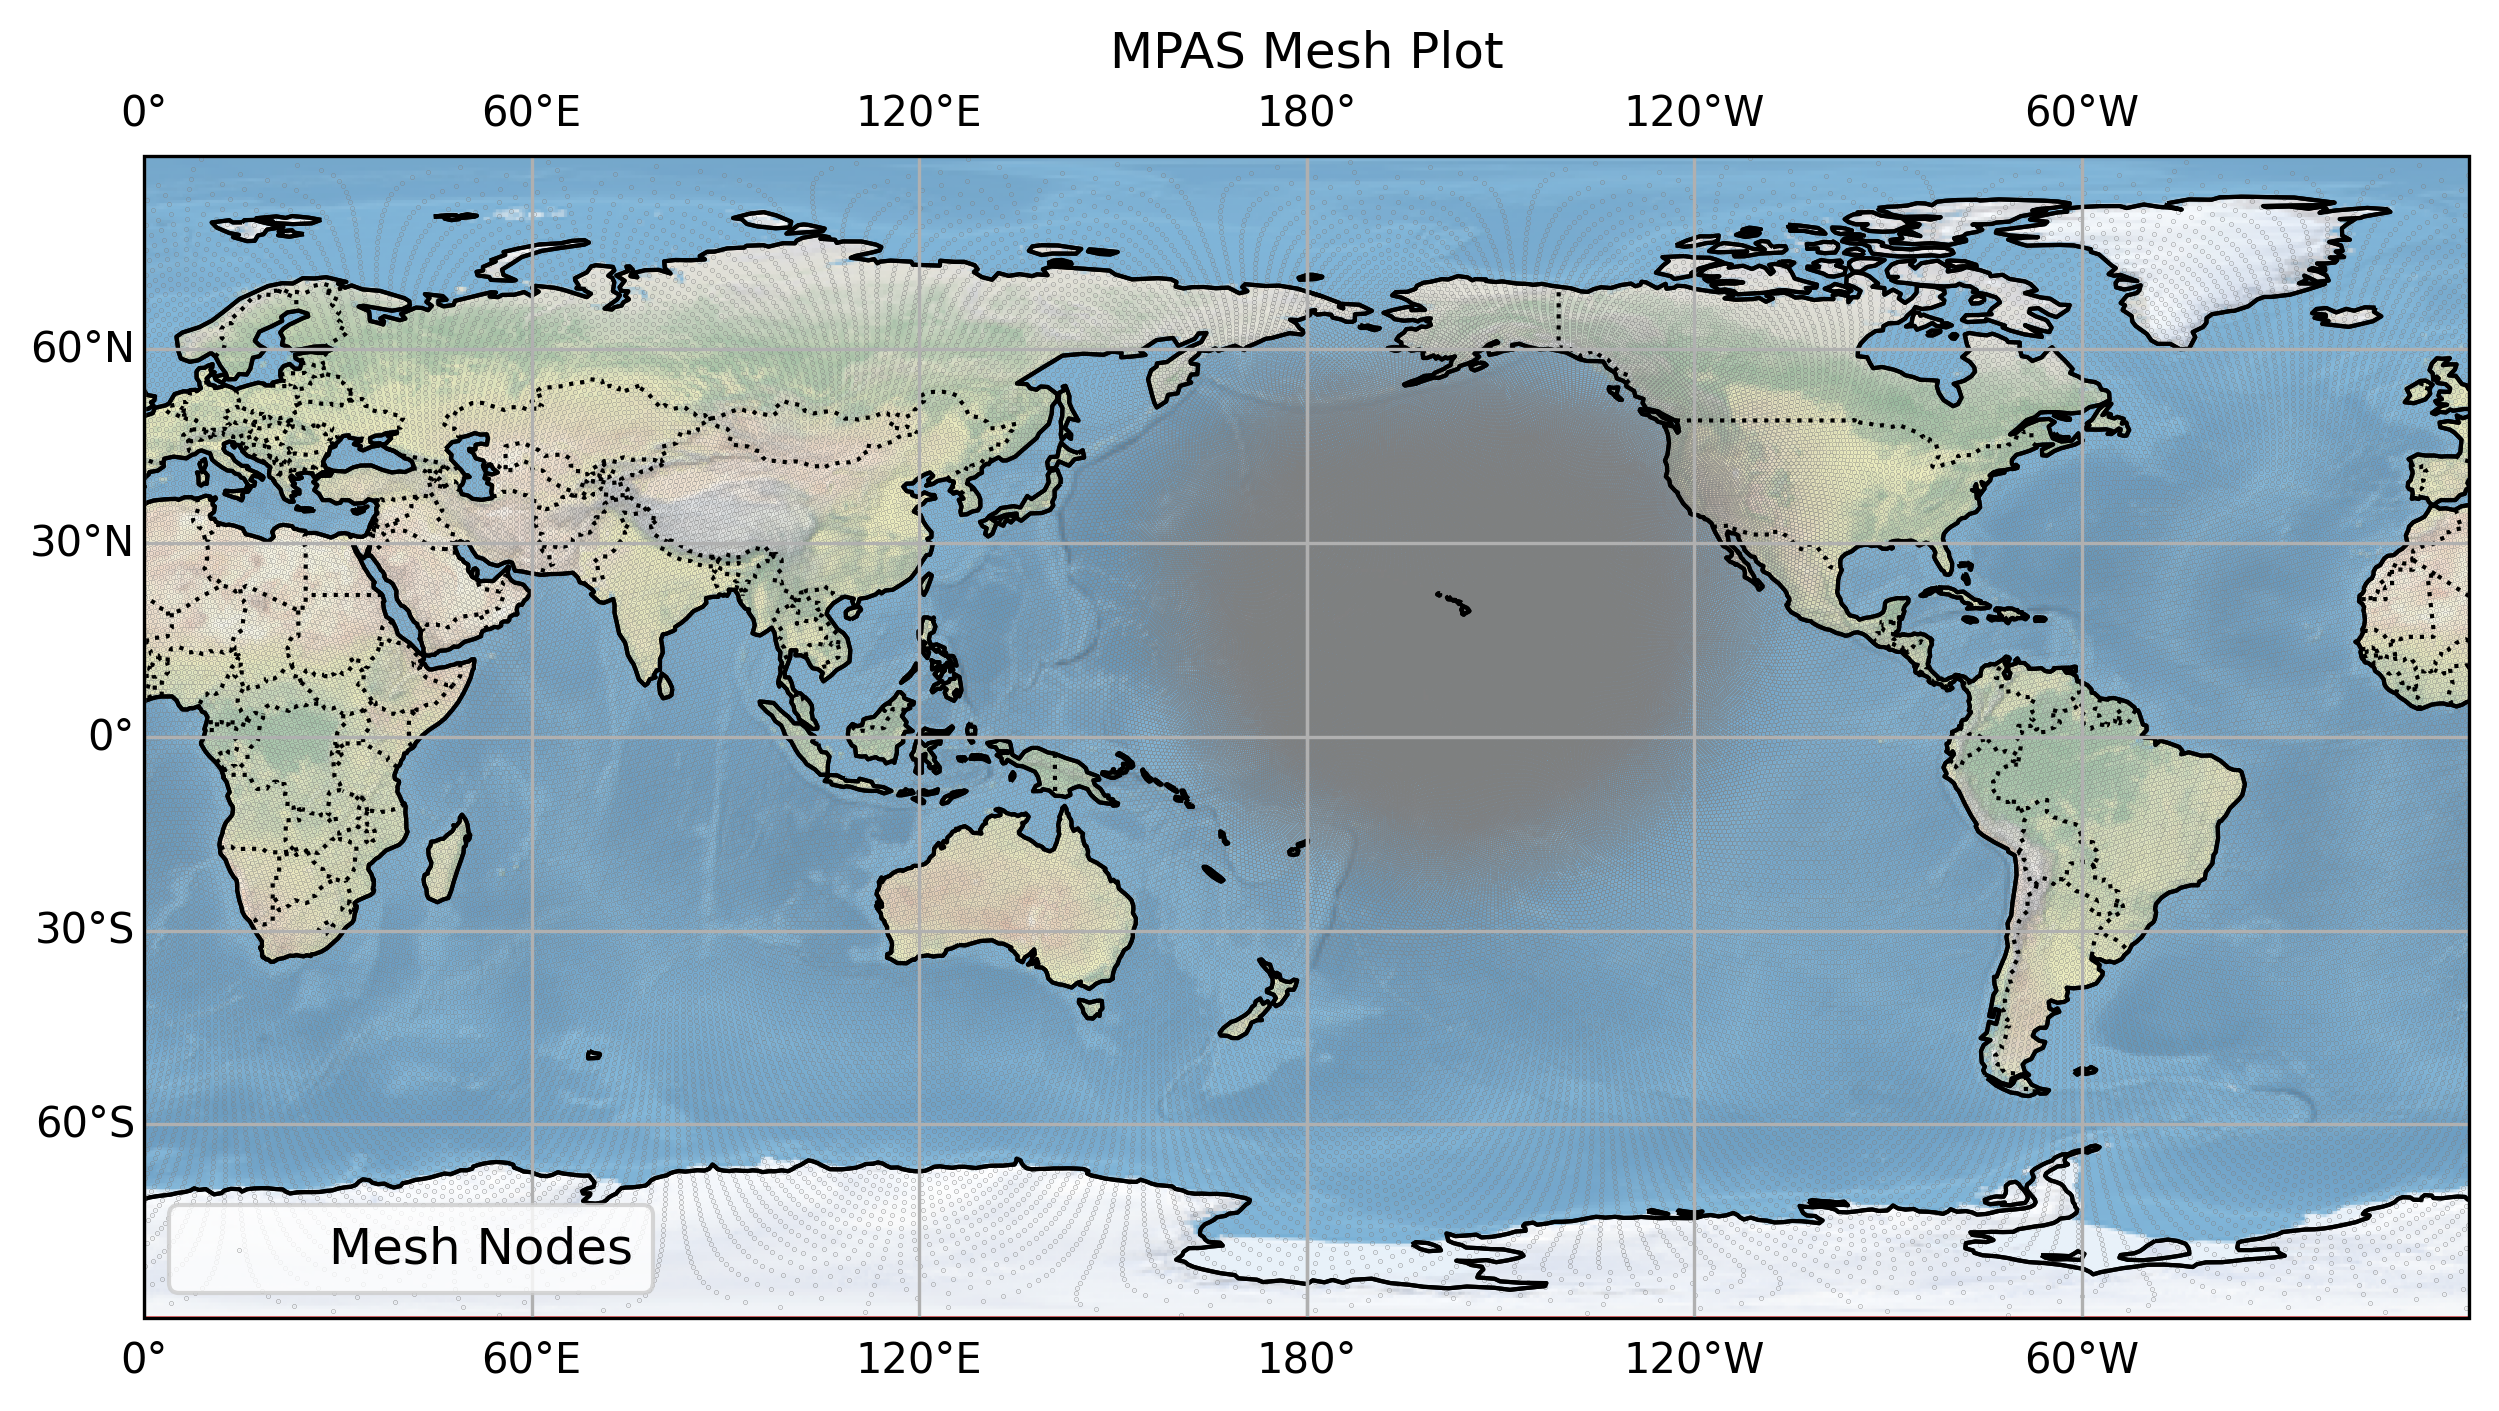

In [6]:
flnm = '/glade/derecho/scratch/mingge/MPAS-Model/25-90km_mesh/x4.163842.static.nc'
 
ds = xr.open_dataset(flnm)

# Extract latitude and longitude coordinates of the mesh cells
lat = ds['latCell'].values*rad2deg   
lon = ds['lonCell'].values*rad2deg   

# Optional: If the mesh contains triangle connectivity information (faces), extract it
# This step may vary depending on your MPAS mesh file format
#faces = ds['faceNodes'].values  # Indices of the mesh face connectivity (i.e., triangles)
#faces = ds['cellsOnVertex'].values

# setting the central meridian to 180°
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, dpi=300)

# ax.set_global or plot_ax.set_extent
#ax.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)], crs=ccrs.PlateCarree())
#ax.set_extent([-40, 40, -30, 30], crs=ccrs.PlateCarree())
ax.set_global

# adding geographic or other background images in visualizations.
ax.stock_img()

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='red')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines()

# Add gridlines with latitude and longitude labels
ax.gridlines(draw_labels=True)

# Plot the mesh as scatter points (for vertex locations)
ax.scatter(lon, lat, color='grey', s=0.01, label='Mesh Nodes', transform=ccrs.PlateCarree())

'''
print('plot the edges of the mesh')
# plot the edges of the mesh (slow !)
for face in faces:
    # Each face (triangle) consists of 3 nodes; get their lat/lon coordinates
    lons_face = lon[face]
    lats_face = lat[face]
    ax.plot(np.append(lons_face, lons_face[0]), np.append(lats_face, lats_face[0]),
            color='blue', lw=0.5, transform=ccrs.PlateCarree())
'''

# Title and legend
ax.set_title('MPAS Mesh Plot')
ax.legend(loc='lower left', fontsize=12);


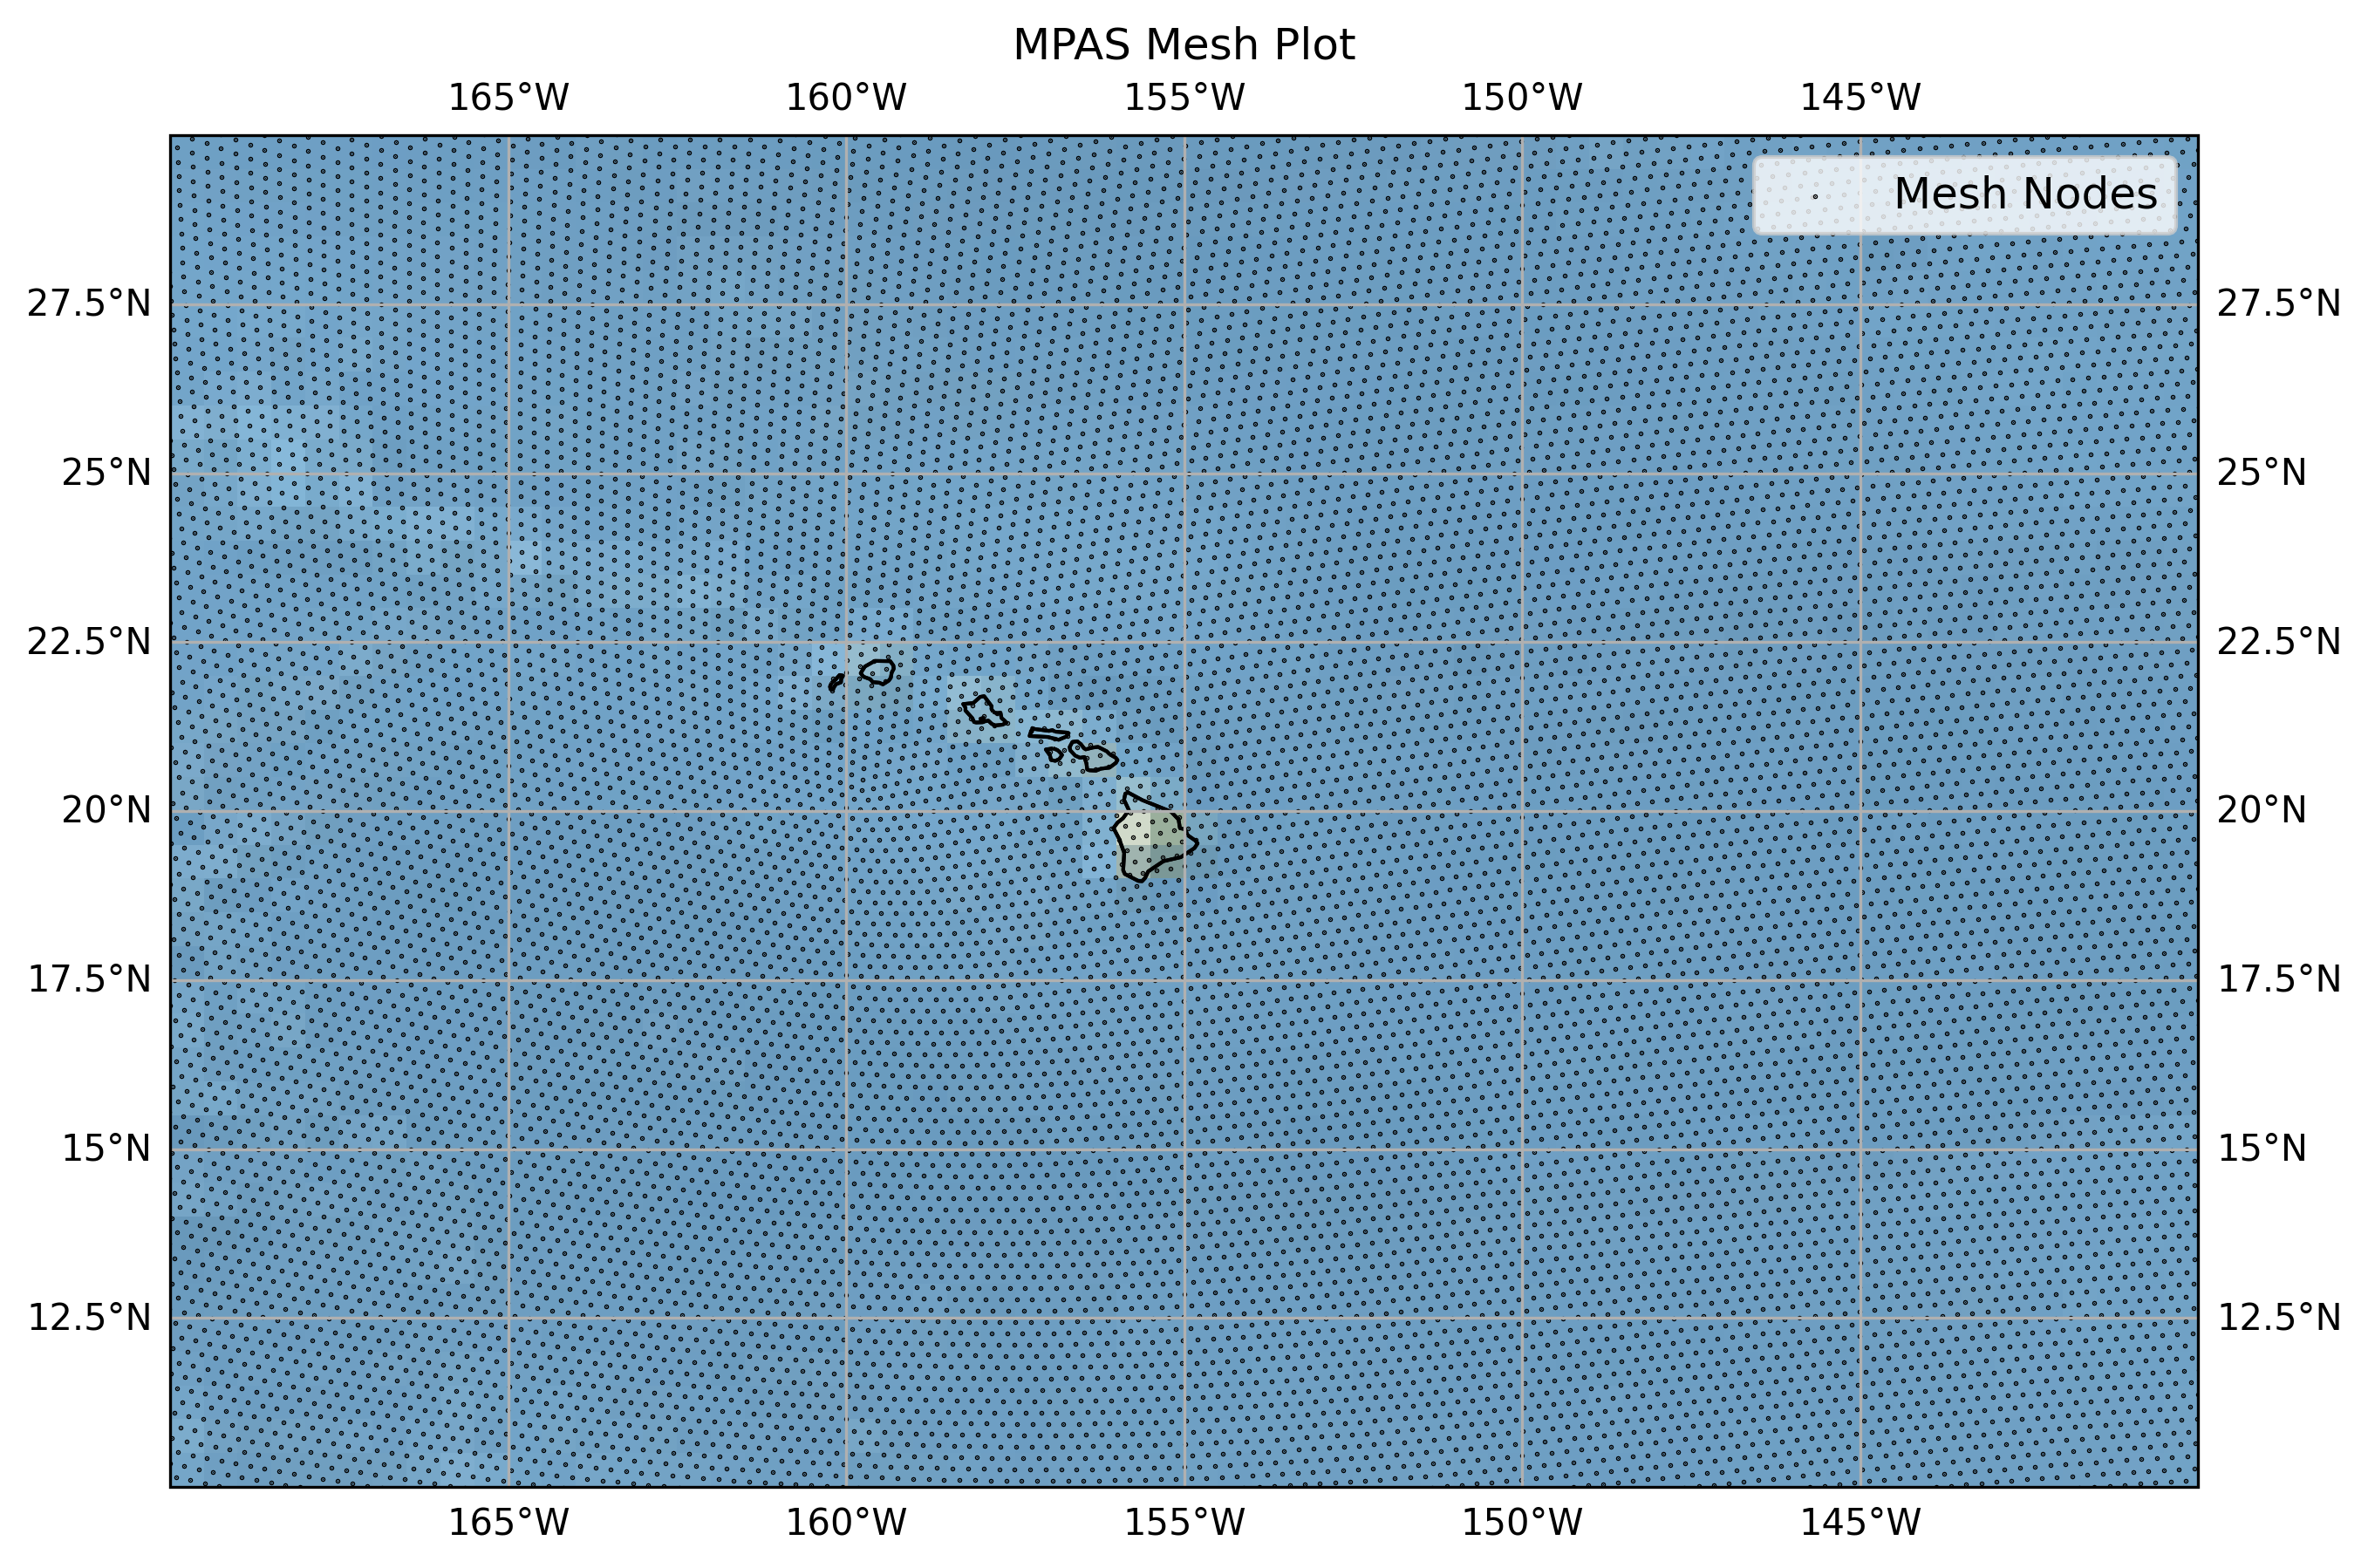

In [7]:

fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=300)

ax.set_extent([-170, -140, 10, 30], crs=ccrs.PlateCarree())
 

# adding geographic or other background images in visualizations.
ax.stock_img()

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='red')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines()

# Plot the mesh as scatter points (for vertex locations)
ax.scatter(lon, lat, color='black', s=0.1, transform=ccrs.PlateCarree(), label='Mesh Nodes')

# Add gridlines with latitude and longitude labels
ax.gridlines(draw_labels=True)

# Title and legend
ax.set_title('MPAS Mesh Plot')
ax.legend( loc='upper right', fontsize=12);
